In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import MESS
import numpy as np
import pandas as pd


from IPython.display import display
from scipy.stats import entropy

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Use the Reunion spider data for testing
First quickly munge the spider data into the form we need.

In [2]:
sp_dir = "/home/isaac/Continuosity/MESS/empirical_data/Reunion_spiders/"
sp_abunds = pd.read_csv(sp_dir + "spider_abunds_df.txt", index_col=0, header=0)
sp_pis = pd.read_csv(sp_dir + "spider.pis", sep=" ", index_col=1, header=None)
sp_pis.index = [x.split("/")[1].split(".")[0] for x in sp_pis.index]
sp_df = pd.concat([sp_abunds, sp_pis], axis=1, sort=False)
sp_df.columns = ["abundance", "pi"]
sp_df.to_csv(sp_dir + "spider.dat", header=True)
print("Reunion Spider S: {}, J: {}".format(len(sp_df), np.sum(sp_df["abundance"])))
sp_df[:2]

Reunion Spider S: 57, J: 5493


,abundance,pi
GL-01a,150,0.011126
GL-01b,107,0.023247


In [8]:
np.exp(entropy(sp_df["abundance"]))

22.33417352226136

(0.00828349828045235, 0.010580619381542623)


(array([32.,  7.,  5.,  0.,  2.,  4.,  1.,  3.,  1.,  2.]),
 array([0.        , 0.00387543, 0.00775086, 0.01162629, 0.01550172,
        0.01937715, 0.02325258, 0.02712802, 0.03100345, 0.03487888,
        0.03875431]),
 <a list of 10 Patch objects>)

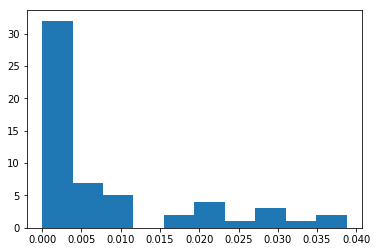

In [14]:
print(np.mean(sp_df["pi"]), np.std(sp_df["pi"]))
plt.hist(sp_df["pi"])

## Run simulations

In [10]:
r = MESS.Region("Reunion")
## Region params
r.set_param("project_dir", "./Reunion")
r.set_param("generations", 0)
r.set_param("community_assembly_model", "*")
r.set_param("mutation_rate", 2.2e-8)
r.set_param("alpha", (1000, 10000))

## Metacommunity Params
r.set_param("S_m", "{}-{}".format(len(sp_df), (len(sp_df)*5)))
r.set_param("J_m", 5e5)
r.set_param("speciation_rate", 2)
r.set_param("death_proportion", 0.7)
r.set_param("trait_rate_meta", 2)
r.set_param("ecological_strength", (0.001, 1))

## Local Params
r.set_param("J", np.sum(sp_df["abundance"]))
r.set_param("m", (0.001, 0.01))
r.set_param("speciation_prob", (0.0005, 0.005))

r.write_params(full=True, force=True)


In [8]:
df = pd.read_csv(simfile, sep="\t", header=0)
df[:10]

,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,160,500000,2.0,0.7,2.0,0.00388,0.0,filtering,point_mutation,0.0,1303,570.0,5493.0,0.00104,0.00457,70.0,0.99927,0.00105,0.00481,0.58824,0.92610,17.0,1.04025,1.00879,1.00659,1.00586,3.43758,3.05820,2.80990,2.64626,0.00023,0.00050,2.25263,4.17255,0.00000,0.00000,0.01151,0.00225,1.69132,2.06838,0.01035,0.00175,0.0,50.47850,45.45578,42.67368,41.09907,1.09860,0.66596,0.79785,0.91637,1.02857,0.81640,2.22626,1.45000,-1.58132,3.83563,2.55775,1.52617,1.12765,0.78404,-2.37917,2.91927,1.52918,0.70977,0.01985,0.23950,-0.14473,0.58648,-0.50835,-0.26675,13.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,77,500000,2.0,0.7,2.0,0.06201,0.0,filtering,point_mutation,0.0,9611,570.0,5493.0,0.00134,0.00486,247.0,0.87530,0.00141,0.00498,0.58824,-21.52425,150.0,40.17418,17.25380,12.14866,10.30468,78.40976,61.33959,49.81010,42.11285,0.00092,0.00110,2.14794,6.85363,0.00062,0.00138,0.02988,0.00908,-1.32415,1.85581,0.03149,0.00882,0.0,40.29055,18.19092,12.82614,10.82429,-3.63562,2.10105,-0.14423,-0.19511,-3.03617,3.29321,-3.24523,1.84298,-0.56143,0.61588,-2.72861,1.76911,0.39039,-0.25807,-0.41720,0.81100,0.30756,-1.52410,0.18257,0.26174,-0.10066,-0.11454,-0.31530,0.04452,80.0,32.0,16.0,14.0,4.0,1.0,1.0,0.0,0.0,2.0
2,185,500000,2.0,0.7,2.0,0.00111,0.0,competition,point_mutation,0.0,6413,570.0,5493.0,0.00647,0.00470,345.0,0.98362,0.00647,0.00531,0.58824,6.80003,145.0,42.10811,23.55041,17.69613,14.85118,66.93056,50.18109,39.63321,32.96225,0.00080,0.00110,2.58584,9.86197,0.00035,0.00117,0.03916,0.01834,-0.63469,-0.58897,0.04246,0.02737,0.0,41.48515,24.55295,19.41929,17.01766,3.58398,3.55823,-0.03606,-1.10916,3.89945,6.43594,3.62569,2.42349,-0.09948,0.59498,3.80819,1.63462,0.04171,-1.13473,-0.06342,1.70414,-0.09126,-4.80132,0.09440,0.21110,-0.08424,-0.17840,-0.14664,0.07301,93.0,24.0,17.0,4.0,3.0,3.0,0.0,0.0,0.0,1.0
3,231,500000,2.0,0.7,2.0,0.00552,0.0,filtering,point_mutation,0.0,1677,570.0,5493.0,0.00868,0.00130,11.0,0.06354,0.00798,0.00225,0.58824,5.73043,53.0,1.53706,1.12954,1.09580,1.08472,12.00228,11.22052,10.64634,10.23235,0.00015,0.00029,1.75538,1.70077,0.00000,0.00000,0.00401,0.00366,0.23138,-1.69531,0.00211,0.00754,0.0,28.07590,21.23249,19.02959,17.86463,3.03699,2.12863,-1.51451,2.22500,3.37007,1.77103,2.91323,2.36781,-1.15911,1.44285,3.36962,2.10611,-0.12376,0.23918,0.35540,-0.78215,-0.00045,0.33508,-0.06915,0.06207,0.02298,0.00572,-0.43409,0.07606,40.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,4.0
4,258,500000,2.0,0.7,2.0,0.03235,0.0,neutral,point_mutation,0.0,3877,570.0,5493.0,0.00127,0.00439,146.0,0.30038,0.00117,0.00465,0.58824,0.36973,119.0,6.07636,2.01260,1.69555,1.59899,42.26019,36.22322,31.91926,28.92177,0.00034,0.00051,1.74950,2.89263,0.00000,0.00062,0.01896,0.00691,-1.56969,1.50226,0.02158,0.00412,0.0,29.64401,15.57480,13.24253,12.24204,-0.22278,1.18483,0.17284,5.02570,-0.21535,1.03286,-0.12207,1.20658,0.00576,6.34220,-0.14417,1.02017,0.10072,0.02175,-0.16708,1.31650,0.07118,-0.01269,0.04930,0.23006,-0.03832,0.32765,-0

# Select the best model

In [5]:
#simfile = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/fig5_sims/SIMOUT.txt"
simfile = "/home/iovercast/Continuosity/MESS/jupyter-notebooks/empirical/Reunion_spider/Reunion/SIMOUT.txt"

cla = MESS.inference.Classifier(empirical_df=sp_df, simfile=simfile, algorithm="rf")
est, proba = cla.predict(select_features=True, param_search=True, quick=False, verbose=True)
cla.dump(outfile="{}/{}_classifier.mdl".format("Reunion", "Reunion"))
display(est, proba)
display(cla.feature_importances())


Predict() started: 2019-06-16 17:14:24.030834
Selecting features:
  community_assembly_model	['S', 'abund_h1', 'abund_h2', 'abund_h3', 'abund_h4', 'pi_h1', 'pi_h2', 'pi_h3', 'pi_h4', 'mean_pi', 'std_pi', 'skewness_pi', 'kurtosis_pi', 'median_pi', 'iqr_pi', 'abundance_pi_cor', 'SGD_0', 'SGD_1', 'SGD_2']
All selected features: S abund_h1 abund_h2 abund_h3 abund_h4 pi_h1 pi_h2 pi_h3 pi_h4 mean_pi std_pi skewness_pi kurtosis_pi median_pi iqr_pi abundance_pi_cor SGD_0 SGD_1 SGD_2
Finding best model parameters.
Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.7min finished


{'n_estimators': 1000, 'min_samples_split': 2, 'bootstrap': False, 'max_depth': 50, 'min_samples_leaf': 4}
Predict() finished: 2019-06-16 17:18:30.968781


,community_assembly_model
estimate,neutral


,competition,filtering,neutral
community_assembly_model,0.008336,0.139029,0.852636


,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,abundance_pi_cor,SGD_0,SGD_1,SGD_2
Feature importance,0.05562,0.160323,0.070464,0.064606,0.069922,0.060038,0.043451,0.035829,0.034168,0.055898,0.088759,0.038164,0.036305,0.010434,0.033922,0.043632,0.049102,0.03001,0.019351


array([<matplotlib.axes._subplots.AxesSubplot object at 0x2aab5d1848d0>],
      dtype=object)

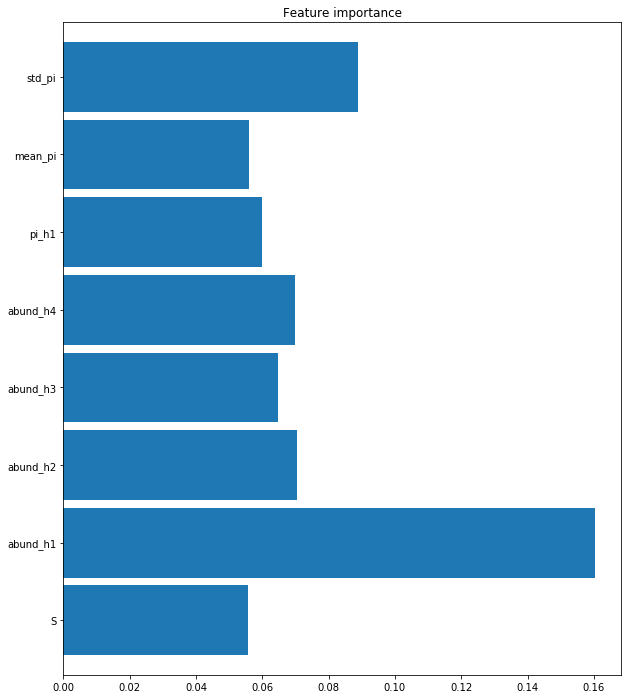

In [6]:
cla.plot_feature_importance()

# Estimate parameters

In [12]:
rgr = MESS.inference.Regressor(empirical_df=sp_df, simfile=simfile, target_model="filtering", algorithm="rf")

est = rgr.predict(select_features=False, param_search=True, quick=False, verbose=True)
rgr.dump(outfile="{}/{}_regressor.mdl".format("Reunion", "Reunion"))

display(est, rgr.feature_importances())


Predict() started: 2019-06-18 12:23:14.906723
Finding best model parameters.
Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.5min finished


{'n_estimators': 400, 'min_samples_split': 5, 'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2}
Predict() finished: 2019-06-18 12:27:50.670243


,alpha,S_m,ecological_strength,m,generation,speciation_prob,_lambda
estimate,6739.291857,179.341597,0.058534,0.004946,269.904435,0.001291,0.731641


,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,abundance_pi_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
Feature importance,0.013623,0.049858,0.019532,0.015375,0.016825,0.019244,0.013613,0.012186,0.017456,0.414477,0.024724,0.026346,0.028127,0.043481,0.075511,0.0,0.068419,0.024275,0.030068,0.015575,0.016029,0.014491,0.011241,0.010009,0.007232,0.006215,0.006069


In [11]:
## RF w/ neutral sims
est

,alpha,S_m,ecological_strength,m,generation,speciation_prob,_lambda
estimate,8033.441712,188.241733,0.141119,0.004049,909.92188,0.000836,0.806925


In [9]:
## RFQ w/ neutral sims
display(est, rgr.feature_importances())

,alpha,S_m,ecological_strength,m,generation,speciation_prob,_lambda
estimate,8244.365555,212.259065,0.243336,0.002979,1220.588999,0.000831,0.901052
lower 0.025,5856.050638,95.000000,0.001360,0.001050,582.162016,0.000510,0.824296
upper 0.975,9827.322933,283.000000,0.862819,0.007936,2231.680635,0.001433,0.992673


,S,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9,abund_h1,abund_h2,abund_h3,abund_h4,abundance_pi_cor,iqr_pi,kurtosis_pi,mean_pi,median_pi,pi_h1,pi_h2,pi_h3,pi_h4,skewness_pi,std_pi,trees
alpha,0.032252,0.028734,0.019580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032112,0.044545,0.038411,0.041924,0.033588,0.059764,NaN,0.198376,0.33817,0.067752,0.023238,NaN,NaN,NaN,0.041555,NaN
S_m,0.348954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.251711,NaN,NaN,NaN,NaN,0.399335,NaN,NaN,NaN,NaN,NaN
ecological_strength,0.043756,0.046508,0.035117,0.037292,0.029635,0.025268,0.029903,0.014654,0.013165,0.018062,0.015257,0.059465,0.036285,0.029433,0.029815,0.094965,0.036896,0.062298,0.039140,0.02312,0.049539,0.035238,0.029554,0.040996,0.077379,0.047261,0.0
m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.309281,0.314117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.376602,NaN,NaN,NaN
generation,0.180574,0.036219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.136720,0.572150,NaN,NaN,NaN,NaN,NaN,0.074337,NaN,NaN,NaN,NaN,NaN,NaN
speciation_prob,0.780600,0.032739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042711,0.033503,0.032874,0.032482,NaN,0.016331,NaN,0.015189,NaN,NaN,NaN,NaN,NaN,NaN,0.013571,NaN
_lambda,0.002204,0.001722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002288,0.047368,0.276715,0.666181,NaN,NaN,0.001949,NaN,NaN,0.001570,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
_ = rgr.plot_feature_importance(figsize=(10, 20))

## Perform posterior predictive check

In [ ]:
rgr = MESS.inference.Ensemble.load("{}/{}_regressor.mdl".format("Reunion", "Reunion"))
est = rgr.empirical_pred
MESS.inference.posterior_predictive_check(empirical_df=sp_df,
                                          parameter_estimates=est,
                                          est_only=False,
                                          nsims=20,
                                          verbose=True)

New simulations will be appended to SIMOUT.txt in './ppc'. Use `force=True` to overwrite.
  [#                   ]   5% Performing simulations 

## Save regressor to file/model to file

# Trash below here

In [ ]:
ss = rgr.feature_importances()
ss_mask = ss.apply(lambda x: x > 0.05).any()
masked_ss = ss[ss.columns[ss_mask]]
print(len(ss.columns), len(masked_ss.columns))

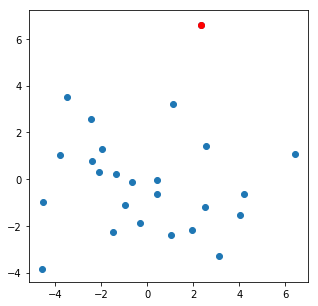

In [9]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA

simfile = "./ppc/SIMOUT.txt"
sim_df = pd.read_csv(simfile, sep="\t", header=0)
## Chop the sims down to only include ss contained in the observed data
obs_ss = MESS.stats.calculate_sumstats(sp_df)
sim_df = sim_df[obs_ss.columns]

fig, ax = plt.subplots(figsize=(5, 5))

dat = pd.concat([obs_ss, sim_df])
#dat = dat[dat.columns[ss_mask]]

dat = PowerTransformer(method='yeo-johnson').fit_transform(dat)

pca = PCA(n_components=2)
pcs = pca.fit_transform(dat)

ax.scatter(pcs[:, 0], pcs[:, 1])
## Plot the observed ss in red
ax.scatter(pcs[:, 0][0], pcs[:, 1][0], c='r')

,competition,filtering,neutral
community_assembly_model,0.74625,0.025833,0.227917


  NB: No features found relevant for target J_m
      Fall back to using all parameters.


,alpha,J_m,ecological_strength,m,speciation_prob,_lambda
estimate,3696.930982,2.658593e+06,4.465569,0.005156,0.000833,0.910659
lower 0.025,1336.375590,1.327991e+05,1.526813,0.001312,0.000118,0.808775
upper 0.975,4926.031178,4.887587e+06,9.596386,0.009544,0.004088,0.998372


,S,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9,abund_h1,abund_h2,abund_h3,abund_h4,abundance_pi_cor,iqr_pi,kurtosis_pi,mean_pi,median_pi,pi_h1,pi_h2,pi_h3,pi_h4,skewness_pi,std_pi,trees
alpha,NaN,0.055138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088699,0.026735,0.021461,0.024905,0.066885,0.316790,0.034617,0.269218,0.006336,0.054150,NaN,NaN,NaN,0.035065,NaN,NaN
J_m,0.053238,0.048200,0.033212,0.033269,0.029151,0.025702,0.03047,0.020942,0.016635,0.014345,0.020083,0.060234,0.042796,0.034577,0.039778,0.098288,0.021022,0.062817,0.042728,0.004054,0.046849,0.036924,0.032327,0.041186,0.061366,0.049807,0.0
ecological_strength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
m,0.329681,0.061032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084335,0.050196,0.041593,0.051049,0.117748,NaN,NaN,0.051919,NaN,NaN,NaN,NaN,0.067449,0.071112,0.073885,NaN
speciation_prob,0.235190,0.168127,NaN,0.013811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.198409,0.027797,0.033306,0.077287,NaN,0.023754,NaN,0.068064,NaN,0.043962,0.016174,0.014271,0.018357,NaN,0.061490,NaN
_lambda,NaN,0.025444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047443,0.026725,0.078086,0.776453,NaN,NaN,NaN,0.019045,NaN,NaN,NaN,NaN,NaN,NaN,0.026804,NaN


  [####################] 100% Performing simulations 
Calculating PCs and plotting


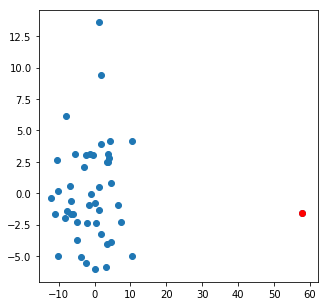

In [23]:
simfile = "/home/isaac/Continuosity/MESS/analysis/full-parameter-estimation/SIMOUT.txt"

cla = MESS.inference.Classifier(empirical_df=sp_df, simfile=simfile)
est, proba = cla.predict()
display(proba)

rgr = MESS.inference.Regressor(empirical_df=sp_df, simfile=simfile)
est = rgr.predict()
display(est, rgr.feature_importances())

MESS.inference.posterior_predictive_check(empirical_df=sp_df,
                                          parameter_estimates=est,
                                          est_only=True,
                                          nsims=20,
                                          verbose=True)

In [218]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
abc = AdaBoostClassifier()
abc.fit(cla.X, cla.y)
abc.predict(cla.empirical_sumstats)

abr = AdaBoostRegressor()
abr.fit(rgr.X, rgr.y["alpha"])
abr.predict(rgr.empirical_sumstats)

array([4128.40555556])

(array([445., 607., 143., 188., 174., 153., 142.,  93.,  32.,  10.]),
 array([  3. ,  32.1,  61.2,  90.3, 119.4, 148.5, 177.6, 206.7, 235.8,
        264.9, 294. ]),
 <a list of 10 Patch objects>)

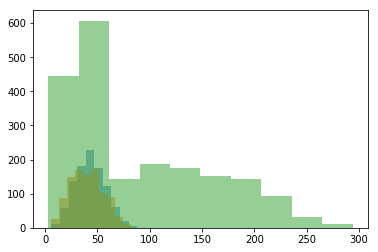

In [32]:
df = pd.read_csv(simfile, sep="\t", header=0)
param = "S"
plt.hist(df[df["community_assembly_model"] == "competition"][param], alpha=.5)
plt.hist(df[df["community_assembly_model"] == "filtering"][param], alpha=.5)
plt.hist(df[df["community_assembly_model"] == "neutral"][param], alpha=.5)


In [25]:
cla.feature_importances()

,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,abundance_pi_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4
Feature importance,0.104787,0.147012,0.062519,0.058322,0.059917,0.059802,0.049695,0.049071,0.045937,0.042155,0.046642,0.035952,0.034173,0.00403,0.022879,0.037079,0.075653,0.018427,0.017443,0.016786,0.011719
